In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import root_mean_squared_error as rmse
import time
import tkinter as tk
from tkinter import messagebox
import math
import matplotlib as mpl
from scipy.spatial import ConvexHull
import glob
# our functions
import predict_Beta_I
import choice_start_day
import plot_hyb

import warnings

warnings.filterwarnings(action='ignore')

# to account for updates when files change
%load_ext autoreload
%autoreload 2

In [2]:
df_seeds = pd.read_csv('initial_data/seeds_set_parameters.csv')
df_seeds[df_seeds.set!='test']['seed_number'].values

array([   0,    1,    2, ..., 1497, 1498, 1499])

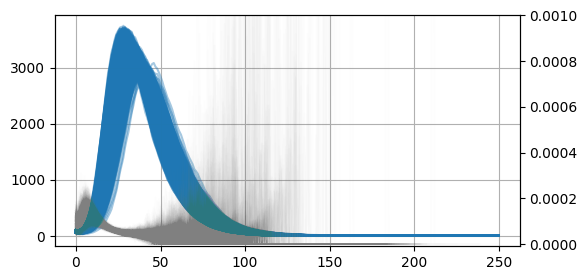

In [3]:
seed_dirs = 'initial_data/initial_data_ba_10000/'
train = df_seeds[df_seeds.set!='test']['seed_number'].values

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for idx, seed_number in enumerate(train):
    seed_df = pd.read_csv(seed_dirs+f'seir_seed_{seed_number}.csv')
    ax.plot(seed_df.I, color='tab:blue', alpha=0.4)
    ax_b.plot(seed_df.Beta, color='gray', alpha=0.01)
    
ax_b.set_ylim(-1e-5, 1e-3)

ax.grid()

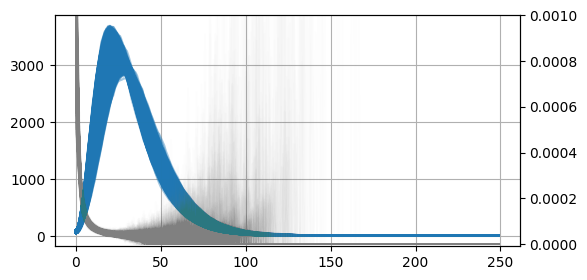

In [4]:
seed_dirs2 = 'initial_data/new_data_ba_10000/'
df_seeds2 = pd.read_csv('initial_data/new_seeds_parameters.csv')
train2 = df_seeds2[df_seeds2.set!='test']['file'].values

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for idx, seed_number in enumerate(train2):
    seed_df = pd.read_csv(seed_number)
    ax.plot(seed_df.I, color='tab:blue', alpha=0.4)
    ax_b.plot(seed_df.Beta, color='gray', alpha=0.01)
    
ax_b.set_ylim(-1e-5, 1e-3)

ax.grid()

In [5]:
part_n1 = df_seeds[(df_seeds.set!='test')&(
            df_seeds.tau==0.04)&(df_seeds.rho==0.005)]
part_n2 = df_seeds2[(df_seeds2.set!='test')&(
            df_seeds2.beta==0.04)&(df_seeds2.init_inf==0.005)]

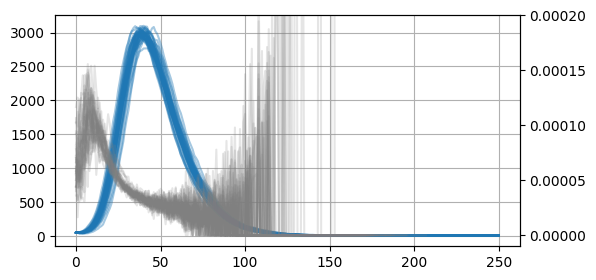

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for idx, seed_number in enumerate(part_n1.seed_number.values):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed_number}.csv')
    ax.plot(seed_df1.I, color='tab:blue', alpha=0.4)
    ax_b.plot(seed_df1.Beta, color='gray', alpha=0.2)
    
        
ax_b.set_ylim(-1e-5, 2e-4)
ax.grid()

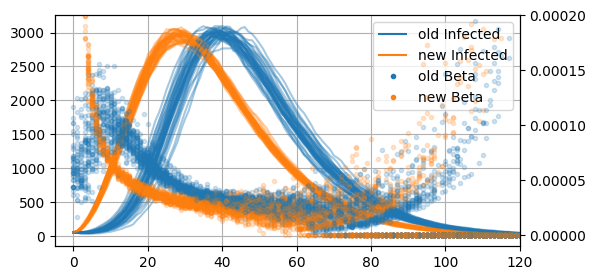

In [7]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

for seed1, seed2 in zip(part_n1.seed_number.values, part_n2.file.values):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    l1 = ax.plot(seed_df1.I, color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
plt.xlim(-5, 120)
ax.grid()

In [8]:
part_n2.shape

(40, 7)

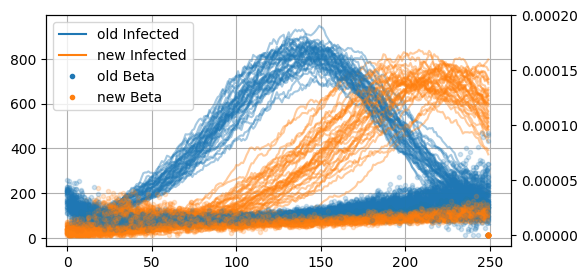

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

seed_dirs = 'initial_data/initial_data_sw_10000/'
seed_dirs2 = 'initial_data/new_sw_10000/'
files = glob.glob('initial_data/new_sw_10000/*.csv')[:40]

for seed1, seed2 in zip(part_n1.seed_number.values, files):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    l1 = ax.plot(seed_df1.I, color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
#plt.xlim(-5, 120)
ax.grid()

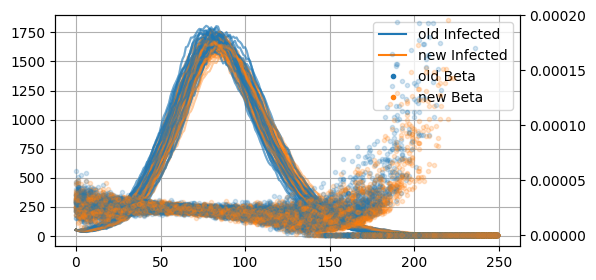

In [10]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

seed_dirs = 'initial_data/initial_data_r_10000/'
files = glob.glob('initial_data/new_r_10000/p*.csv')[:40]

for seed1, seed2 in zip(part_n1.seed_number.values, files):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    ax.plot(seed_df1['I'], color='tab:blue', alpha=0.4,
                label='old Infected')
    l1 = ax.plot(seed_df1['I'], color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
#plt.xlim(-5, 120)
ax.grid()

In [24]:
df_seeds.iloc[300:]

,seed_number,tau,rho,set
300,300,0.05,0.005,train
301,301,0.05,0.005,test
302,302,0.05,0.005,train
303,303,0.05,0.005,test
304,304,0.05,0.005,train
...,...,...,...,...
1495,1495,0.08,0.010,val
1496,1496,0.08,0.010,val
1497,1497,0.08,0.010,train
1498,1498,0.08,0.010,train


In [25]:
part_n12 = df_seeds[(df_seeds.set!='test')&(
            df_seeds.tau==0.05)&(df_seeds.rho==0.01)]
part_n22 = df_seeds2[(df_seeds2.set!='test')&(
            df_seeds2.beta==0.05)&(df_seeds2.init_inf==0.01)]

In [28]:
part_n22.index

Index([550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 563, 564,
       565, 567, 568, 570, 573, 575, 576, 577, 578, 580, 581, 582, 583, 585,
       586, 587, 588, 589, 591, 592, 593, 594, 595, 596, 598, 599],
      dtype='int64')

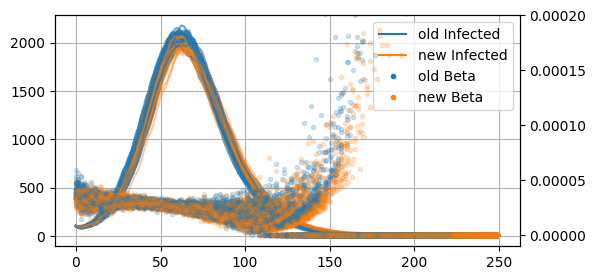

In [41]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

seed_dirs = 'initial_data/initial_data_r_10000/'
files = glob.glob('initial_data/new_r_10000/p*.csv')

for seed1, seed2 in zip(part_n12.seed_number.values, 
                        np.array(files)[part_n22.index]):
    seed_df1 = pd.read_csv(seed_dirs+f'seir_seed_{seed1}.csv')
    ax.plot(seed_df1['I'], color='tab:blue', alpha=0.4,
                label='old Infected')
    l1 = ax.plot(seed_df1['I'], color='tab:blue', alpha=0.4,
                label='old Infected')
    l3 = ax_b.plot(seed_df1.Beta, color='tab:blue', alpha=0.2,
                  label='old Beta', ls='', marker='.')
    
    seed_df2 = pd.read_csv(seed2)
    l2 = ax.plot(seed_df2.I, color='tab:orange', alpha=0.4,
                label='new Infected')
    l4 = ax_b.plot(seed_df2.Beta, color='tab:orange', alpha=0.2,
                  label='new Beta', ls='', marker='.')
    
    
lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]

leg = ax.legend(lns, labs)
for lh in leg.legend_handles: 
    lh.set_alpha(1)
leg.set_zorder(99)

ax_b.set_ylim(-1e-5, 2e-4)
#plt.xlim(-5, 120)
ax.grid()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

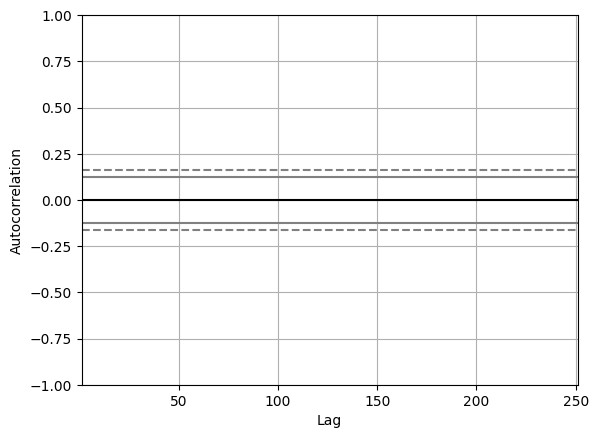

In [11]:
pd.plotting.autocorrelation_plot(seed_df1.Beta)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

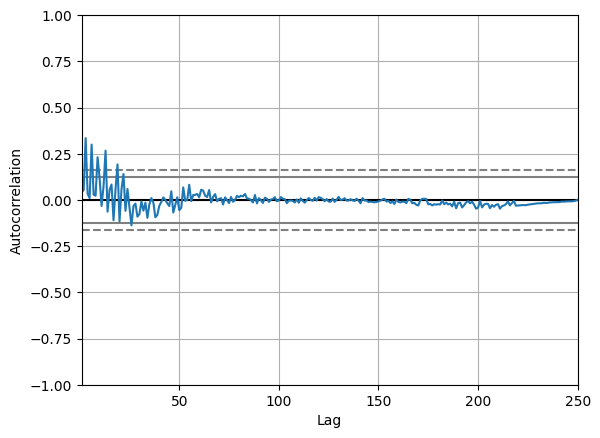

In [12]:
# 10 - 14 days
pd.plotting.autocorrelation_plot(seed_df2.Beta)


In [13]:
seed_df1.head(5)

,S,E,I,R,Beta
0,9950,0,50,0,0.000028
1,9936,14,49,1,0.000035
2,9919,29,51,1,0.000040
3,9899,48,44,9,0.000055
4,9875,66,46,13,0.000033


In [14]:
seed_df2.head(5)

,S,E,I,R,Beta
0,9950,0,50,0,0.000038
1,9931,19,47,3,0.000032
2,9916,31,46,7,0.000024
3,9905,40,43,12,0.000021
4,9896,43,44,17,0.000018


In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
model = ARIMA(seed_df2.Beta, order=(10,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   Beta   No. Observations:                  250
Model:                ARIMA(10, 1, 0)   Log Likelihood                2347.307
Date:                Thu, 31 Jul 2025   AIC                          -4672.615
Time:                        13:44:54   BIC                          -4633.923
Sample:                             0   HQIC                         -4657.040
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9640   3.33e-20   -2.9e+19      0.000      -0.964      -0.964
ar.L2         -0.8864   3.83e-19  -2.31e+18      0.000      -0.886      -0.886
ar.L3         -0.6083   2.79e-19  -2.18e+18      0.0

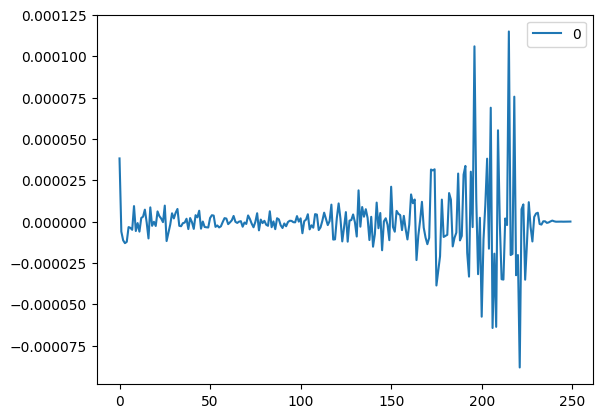

In [44]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()


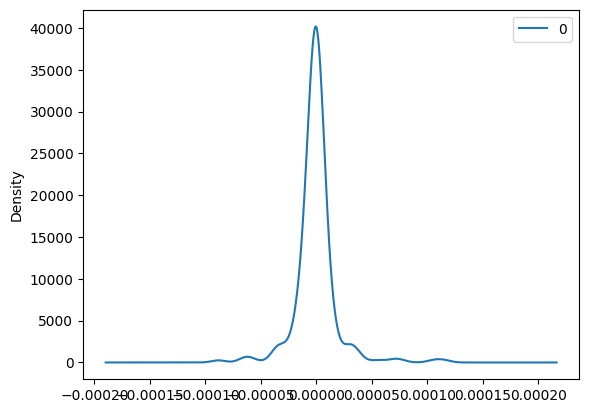

                  0
count  2.500000e+02
mean  -3.279342e-07
std    1.882802e-05
min   -8.823703e-05
25%   -4.577977e-06
50%   -3.230689e-07
75%    3.321063e-06
max    1.149718e-04


In [45]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [17]:
df2 = pd.DataFrame()
for seed1, seed2 in zip(part_n1.seed_number.values, files):
    seed_df2 = pd.read_csv(seed2)
    df2 = pd.concat([df2,seed_df2])

df2 = df2.reset_index().rename(columns={'index':'day'})

In [18]:
df2

,day,S,E,I,R,Beta
0,0,9950,0,50,0,0.000026
1,1,9937,13,42,8,0.000017
2,2,9930,19,39,12,0.000015
3,3,9924,24,40,12,0.000020
4,4,9916,27,44,13,0.000018
...,...,...,...,...,...,...
9995,245,900,0,3,9097,-0.000000
9996,246,900,0,3,9097,-0.000000
9997,247,900,0,3,9097,-0.000000
9998,248,900,0,3,9097,-0.000000


(0.0, 1000.0)

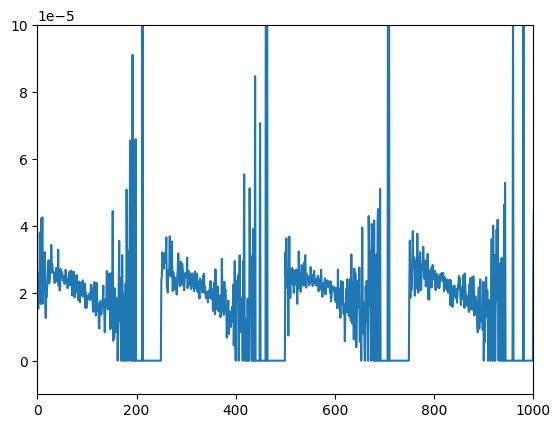

In [19]:
plt.plot(df2.Beta);
plt.ylim(-1e-5,1e-4)
plt.xlim(0,1000)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

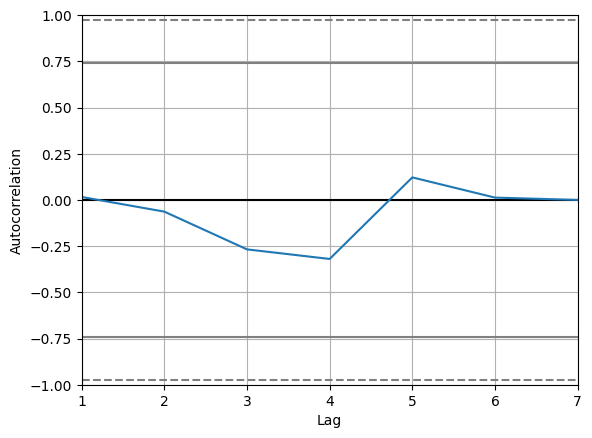

In [20]:
# 10 - 14 days
pd.plotting.autocorrelation_plot(df2.Beta.iloc[:7])


In [21]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset

as_train = 500
to_pred = 500

del_cols = ['Beta','R','E']
data1 = df2.Beta.iloc[:as_train].values.reshape(-1,1)
data2 = df2.drop(columns=del_cols).iloc[:as_train].values
# fit model
model = SARIMAX(data1, exog=data2, order=(7, 1, 1), 
                seasonal_order=(1, 1, 1, 250))
model_fit = model.fit(disp=False#, start_params=[0,0,0,0,0,0,0]
                     )
# make prediction
exog2 = df2.drop(columns=del_cols).iloc[as_train:as_train+to_pred+1].values
yhat = model_fit.predict(as_train, as_train+to_pred, exog=exog2)


D:\Programs\Anaconda\envs\abm_seir\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MemoryError: Unable to allocate 986. MiB for an array with shape (508, 508, 501) and data type float64

(-1e-05, 0.0001)

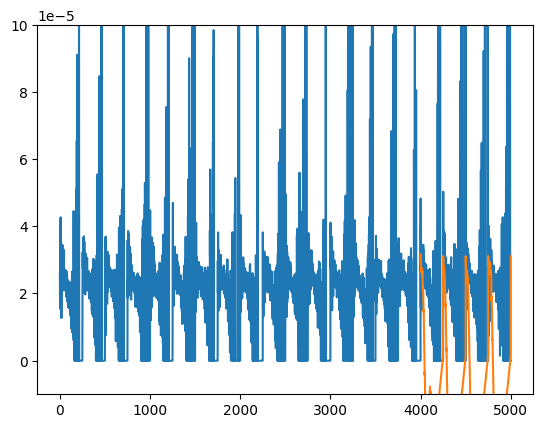

In [160]:
plt.plot(np.arange(as_train+to_pred), 
         df2.Beta.iloc[:as_train+to_pred])
plt.plot(np.arange(as_train, as_train+to_pred+1), yhat)
plt.ylim(-1e-5,1e-4)

## sw

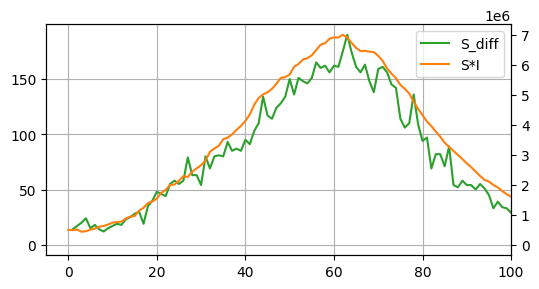

In [95]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df1.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df1.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)

lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()

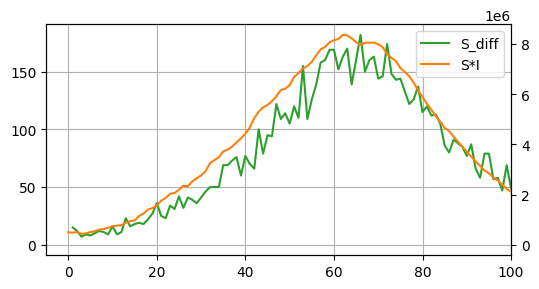

In [96]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df2.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df2.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)


lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()

## ba

In [49]:
seed_df1.head()

,S,E,I,R,Beta
0,9950,0,50,0,0.000103
1,9899,51,45,5,0.000112
2,9849,96,48,7,0.000078
3,9812,124,52,12,0.000104
4,9759,167,60,14,0.000084


In [50]:
seed_df2.head()

,S,E,I,R,Beta
0,9950,0,50,0,0.000726
1,9589,345,65,1,0.000542
2,9251,637,106,6,0.000355
3,8903,919,161,17,0.000254
4,8539,1183,247,31,0.000173


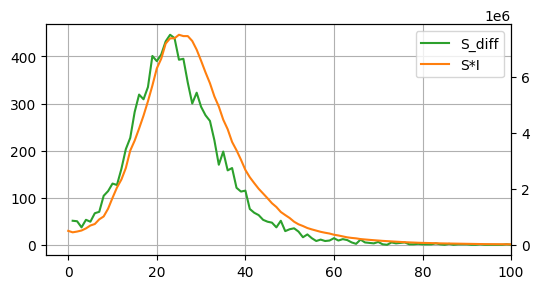

In [56]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df1.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df1.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)

lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()

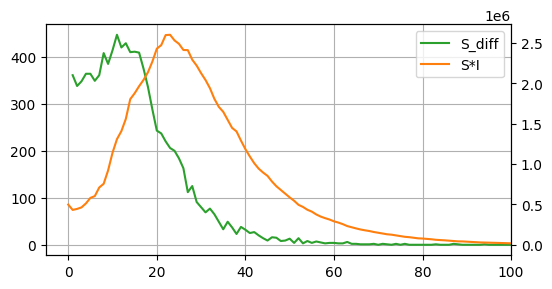

In [57]:
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax_b = ax.twinx()

l1 = ax.plot(-seed_df2.S.diff(), color='tab:green', label='S_diff')
l2 = ax_b.plot(seed_df2.S * seed_df1.I, color='tab:orange', label='S*I')

plt.xlim(-5, 100)


lns = l1+l2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.grid()